# 1. 事前にハイパーパラメータのチューニングを行います

## パラメータチューニング手法
- grid search
- random-search
- bayse optimzation

上の3つが用意されています。

※ チューニングには時間がかかります

## 学習
チューニングが終わったら学習が始まります。こちらはすぐに終わります。

## 入力

今回はTraininConfigクラスに入力をまとめる形を取ります。

**入力変数の説明**
- csv_path
csvデータのパスです。
- mode = "regression もしくは clastaring" 
今回の場合regression（回帰）で良いです。
- tuning_method = "grid-search or random-search or bayse optimization" 
チューニング方法です。grid-search, random-search, bayse optimizationの中から選んでください。

grid-search 時間がかかります(30分~1時間)。

random-search 時間が短縮されます。

bayse optimization 時間がかかるのと今回の場合だとあまり制度は良くなかったです。


- task_id
モデルの保存先をしていします。`./result/{task_id名}/model.pickle`で保存されます。

## 出力
モデルは`./result/{task_id名}/model.pickle`に保存されます。


In [7]:
# チューニング関数への入力
class TrainingConfig:
    csv_path = './sample_data/train_T1.csv' # csvのパス
    tuning_method = 'grid-search' # チューニングメソッド
    task_id = 'T1_pred'
    mode = 'regression'
conf = TrainingConfig

In [ ]:
from train import train
train(conf)

tuning start
X data range will be extract by slice...
shape of x::: (281, 2048)
shape of y::: (281,)
sample of data loaded as X:::[0 0 0 ... 0 0 0]
sample of data loaded as Y:::2.0106
------------First Validation------------
step1 : -0.08644364518772858
step2 : -0.0947016004491407
step3 : -0.042312282614157336
----------------------------------------


 12%|████▋                                | 1/8 [00:03<00:26,  3.73s/it]

validation score ::: [-3.66050355 -0.11146106 -0.12140237 -0.10095249 -0.06885404 -0.06695412
 -0.07790129 -0.07559798 -0.06795654 -0.07448584]


 25%|█████████▎                           | 2/8 [00:07<00:21,  3.51s/it]

validation score ::: [-0.18422651 -0.05392076 -0.05583866 -0.06338247 -0.05833304 -0.0665065
 -0.07346228 -0.06989806 -0.06978092 -0.06838816 -0.07448584]


 38%|█████████████▉                       | 3/8 [00:10<00:16,  3.33s/it]

validation score ::: [-0.07448584 -0.07417386 -0.07340436 -0.07288664 -0.07349711 -0.0735589
 -0.07097941 -0.06987261]


 50%|██████████████████▌                  | 4/8 [00:13<00:13,  3.36s/it]

validation score ::: [-0.06748693 -0.06725848 -0.06642707 -0.06485668 -0.0720688  -0.06270846
 -0.0646266  -0.07448584]


# 2. 予測と評価

- R2で評価します。

問題があって、再現がとれなくなっています。上のチューニング手法だと、R2 < 0.02と低くじゃっているかと思います。
自分が前回作成したモデルだと問題なく予測できています(R2 > 0.8)。こちらの再現を取りたかったら、`渡辺再現用`を実行してください。

In [4]:
from xgb import xgb_pred_val

In [5]:
csv_path = './sample_data/test_T1.csv'
model_path = './result/T1/model.pickle'.format(conf.task_id)

In [6]:
model = xgb_pred_val(csv_path, model_path)

XGBoostError: [11:22:07] /private/var/folders/5f/6xhcjnrj0jz9ghgx83y_v2d80000gn/T/pip-install-yer97c2h/xgboost_9b1ef5bfcdc6482bb45c50569668c30e/build/temp.macosx-12.0-arm64-3.8/xgboost/src/common/json.cc:458: Expecting: """, got: "76 ", around character position: 1
    {L\0\0\0\0\0\0\0
    ^~~~~~~~~
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x000000016dd30420 dmlc::LogMessageFatal::~LogMessageFatal() + 124
  [bt] (1) 2   libxgboost.dylib                    0x000000016dd50fb8 xgboost::JsonReader::Error(std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >) const + 964
  [bt] (2) 3   libxgboost.dylib                    0x000000016dd519fc xgboost::JsonReader::Expect(char, char) + 268
  [bt] (3) 4   libxgboost.dylib                    0x000000016dd52494 xgboost::JsonReader::ParseObject() + 660
  [bt] (4) 5   libxgboost.dylib                    0x000000016dd50b6c xgboost::JsonReader::Parse() + 444
  [bt] (5) 6   libxgboost.dylib                    0x000000016dd5322c xgboost::Json::Load(xgboost::StringView) + 36
  [bt] (6) 7   libxgboost.dylib                    0x000000016ddc4adc xgboost::LearnerIO::Load(dmlc::Stream*) + 196
  [bt] (7) 8   libxgboost.dylib                    0x000000016dd2beac XGBoosterUnserializeFromBuffer + 128
  [bt] (8) 9   libffi.dylib                        0x00000001c33d0050 ffi_call_SYSV + 80



## 渡辺再現用

In [2]:
from xgb import xgb_pred_val

In [3]:
csv_path = './sample_data/test_T1.csv'
model_path = './result/T1/xgb_model_T1.pickle'

shape of x::: (106, 2048)
shape of y::: (106,)
 r2 score plot saved!!
0.885388902463001


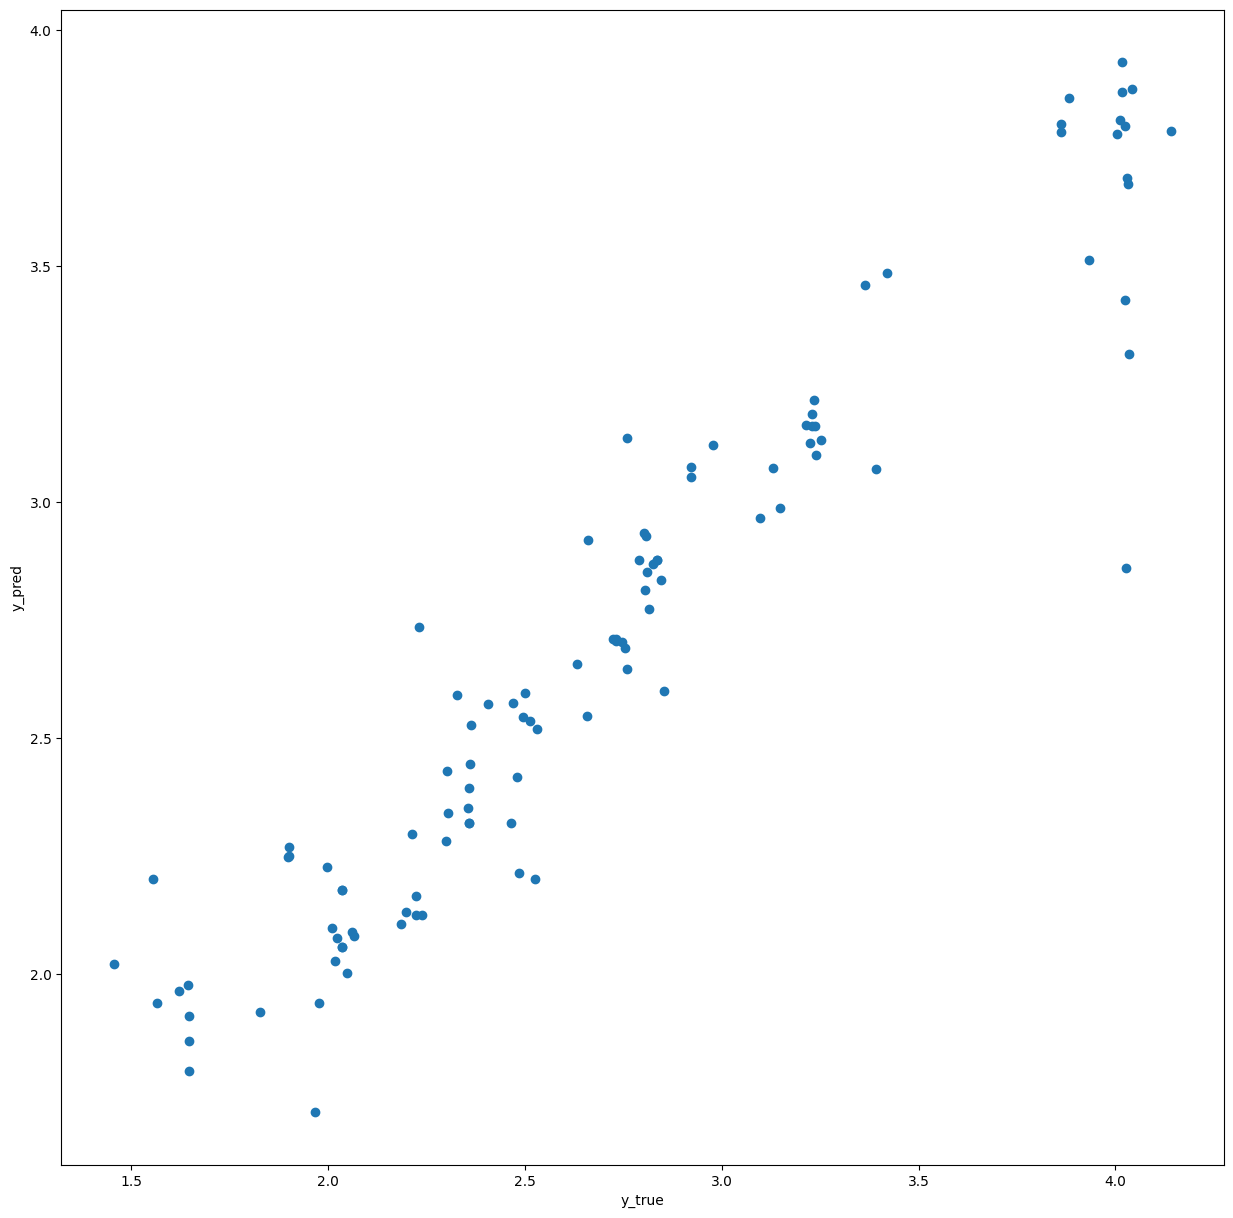

In [3]:
model = xgb_pred_val(csv_path, model_path)

In [15]:
params = model.get_xgb_params()
print(params)
import json
f = open('./best_params.json', 'w')
json.dump(params, f)

{'objective': 'reg:squarederror', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.5, 'gamma': 0.01, 'gpu_id': -1, 'interaction_constraints': '', 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 14, 'monotone_constraints': '()', 'n_jobs': 8, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 0, 'reg_alpha': 0.3, 'reg_lambda': 0.3, 'scale_pos_weight': 1, 'subsample': 1.0, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}
